In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # scientific computation
import pandas as pd # loading dataset file
import matplotlib.pyplot as plt # Visulization
import nltk  # Preprocessing our text
from nltk.corpus import stopwords # removing all the stop words
from nltk.stem.porter import PorterStemmer # stemming of words
from nltk

In [ ]:
#Load our dataset
df = pd.read_csv("/content/drive/MyDrive/Externship/spam_ham_dataset.csv")

In [ ]:
df.shape

(5171, 4)

In [ ]:
# dimensions of the dataset
df.ndim

2

In [ ]:
#size of the datset
df.size

20684

In [ ]:
# rerturn the sum of all null values
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.head()

Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

In [ ]:
df.tail()

Unnamed: 0 label                                               text  \
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1

([<matplotlib.axis.XTick at 0x7f8efb898ed0>,
 [Text(0, 0, 'non-spam'), Text(0, 0, 'spam')])

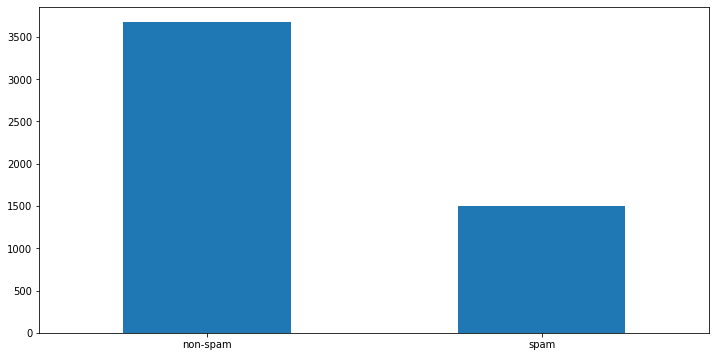

In [ ]:
#visualising the data 
df["label_num"].value_counts().plot(kind = "bar" , figsize = (12,6))
plt.xticks(np.arange(2) , ('non-spam' , 'spam') , rotation = 0)

Cleaning the text

In [ ]:
import re
corpus = []
length = len(df)
# this command is included to facilitate the stopwords commands
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
for i in range(0,length):
  text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
  text = text.lower()
  text = text.split()
  pe = PorterStemmer()
  stopword = stopwords.words("english")
  text = [pe.stem(word) for word in text if not word in set(stopword)]
  text = " ".join(text)
  corpus.append(text)




In [ ]:
corpus

['subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
 'subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl',
 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb 25 januari 1 like think minut calend hand begin fall semest retreat schedul weekend januari 5 6 youth minist confer brad dustin connect week go chang date follow weekend januari 12 13 come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place 13 bedroom 5 bedroom hous

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 35000)
x = cv.fit_transform(corpus).toarray()

In [23]:
#extracting dependent variable form the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:,1].values

DUMPING THE COUNT VECTORIZER

In [24]:
# Importing the pkl library
import pickle
pickle.dump(cv,open('cv.pkl','wb'))


Modelling And Training

In [26]:
# splitting the data into training and validation 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x , y , train_size = 0.8 , test_size = 0.2 , random_state = 0)



Importing the the multinomial naive bayes from sklearn


In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [30]:
model.fit(X_train , y_train)

MultinomialNB()

In [31]:
y_predict = model.predict(X_test)
y_predict


array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

Evaluating the model using accuracy score 

In [32]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_predict)
ascore = accuracy_score(y_test , y_predict)
print(cm)
print('Accyarcy Score is = ' , ascore*100)



[[716  16]
 [ 17 286]]
Accyarcy Score is =  96.81159420289856


Saving our model

In [33]:
import pickle
pickle.dump(model , open("spam.pkl" , "wb") )

testing our model


In [34]:
lmodel = pickle.load(open("spam.pkl" , "rb"))
lmodel.predict(X_test)
lmodel.score(X_test,y_test)

0.9681159420289855

tetsing it on a new spam mail

In [35]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  new_y_pred = lmodel.predict(new_X_test)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
  print("SPAM")
else :
  print("NOT SPAM")

Enter new review...IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out. 
SPAM


In [36]:
from sklearn.svm import SVC
svm1=SVC(kernel='rbf')
svm1.fit(X_train,y_train) 

SVC()

In [37]:
y_pred4=svm1.predict(X_test)
from sklearn.metrics import accuracy_score
svm_rbf=accuracy_score(y_test,y_pred4)
svm_rbf

0.9623188405797102

In [38]:
svm2=SVC(kernel='sigmoid')
svm2.fit(X_train,y_train) 

SVC(kernel='sigmoid')

In [39]:
y_pred5=svm2.predict(X_test)
from sklearn.metrics import accuracy_score
svm_sig=accuracy_score(y_test,y_pred5)
svm_sig

0.9652173913043478

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred6=dt.predict(X_test)
from sklearn.metrics import accuracy_score
dec_tree=accuracy_score(y_test,y_pred6)
dec_tree

0.9449275362318841

In [43]:
models = pd.DataFrame({
    'Model': [ 'MultinomialNB','SVM-rbf','SVM-sigmoid','Decision Tree'],
    'Test Score': [ ascore,svm_rbf,svm_sig,dec_tree,]})
models.sort_values(by='Test Score', ascending=False)

Model  Test Score
0  MultinomialNB    0.968116
2    SVM-sigmoid    0.965217
1        SVM-rbf    0.962319
3  Decision Tree    0.944928